In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("advertising.csv")

In [4]:
df.size

800

In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histogram of Sales')

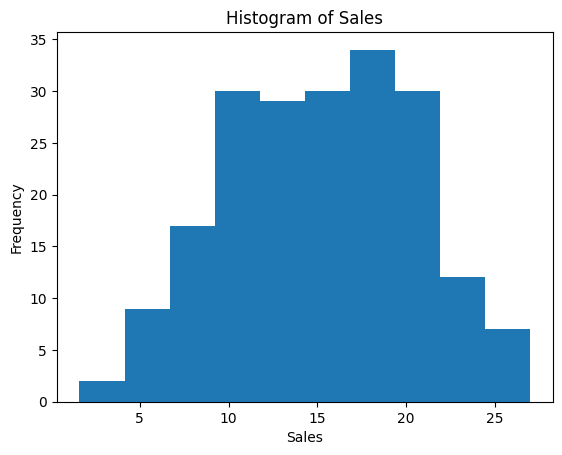

In [10]:
plt.hist(df["Sales"])
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Histogram of Sales")

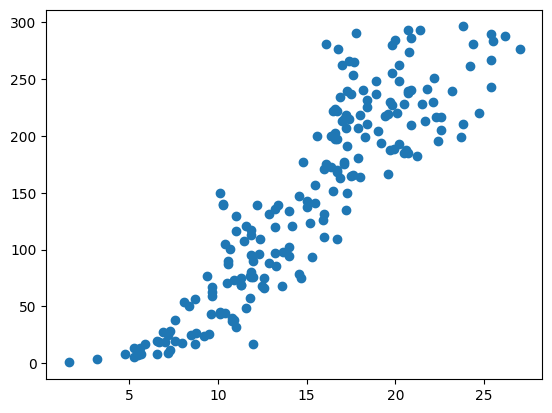

In [11]:
plt.scatter(df["Sales"],df["TV"])

In [12]:
import seaborn as sns

Text(0.5, 1.0, 'Box Plot of Advertising Data')

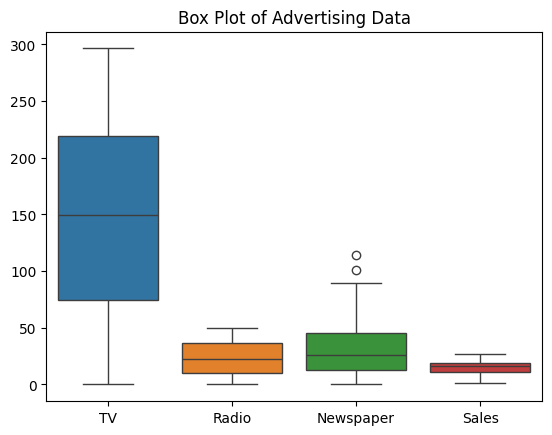

In [13]:
sns.boxplot(data=df)
plt.title("Box Plot of Advertising Data")

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_tv = df[['TV']]     
Y_sales = df[['Sales']]
X_train, X_test, Y_train, Y_test = train_test_split(
    x_tv, Y_sales, test_size=0.2, random_state=42
)

In [16]:
from sklearn.linear_model import LinearRegression
lr_tv = LinearRegression()
lr_tv.fit(X_train, Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [17]:
print("Coefficient:", lr_tv.coef_)
print("Intercept:", lr_tv.intercept_)

Coefficient: [[0.05548294]]
Intercept: [7.00710843]


In [18]:
Y_pred = lr_tv.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("R2 Score:", r2_score(Y_test, Y_pred))

Mean Squared Error: 6.101072906773963
R2 Score: 0.802561303423698


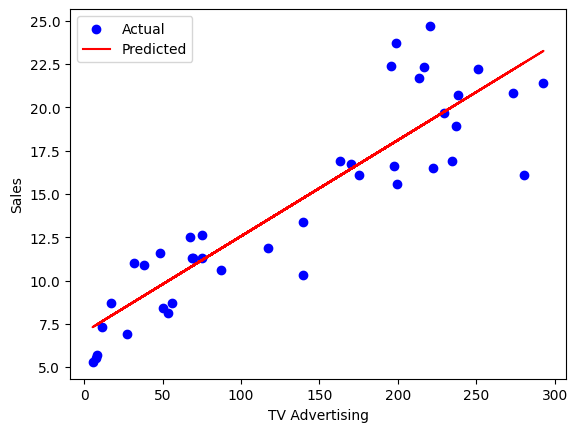

In [21]:
plt.scatter(X_test, Y_test, color='blue', label="Actual")
plt.plot(X_test, Y_pred, color='red', label="Predicted")
plt.xlabel("TV Advertising")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [22]:
comparison = pd.DataFrame({
    'Actual Sales': Y_test.values,
    'Predicted Sales': Y_pred
})
print(comparison)

ValueError: Per-column arrays must each be 1-dimensional